# Playing around with Voronoi diagrams

## Building Voronoi from static points 

In [4]:
from PIL import Image
import random
import math

In [18]:
def generate_voronoi_diagram(width, height, num_cells):
    image = Image.new("RGB", (width, height))
    putpixel = image.putpixel
    imgx, imgy = image.size
    nx = []
    ny = []
    nr = []
    ng = []
    nb = []
    for i in range(num_cells):
        nx.append(random.randrange(imgx))
        ny.append(random.randrange(imgy))
        nr.append(random.randrange(256))
        ng.append(random.randrange(256))
        nb.append(random.randrange(256))
    for y in range(imgy):
        for x in range(imgx):
            dmin = math.hypot(imgx-1, imgy-1)
            j = -1
            for i in range(num_cells):
                d = math.hypot(nx[i]-x, ny[i]-y)
                if d < dmin:
                    dmin = d
                    j = i
            putpixel((x, y), (nr[j], ng[j], nb[j]))
    fig = plt.figure(figsize =(16,6))
    image.save("VoronoiDiagram.png", "PNG")
    plt.imshow(image)
#     image.show()

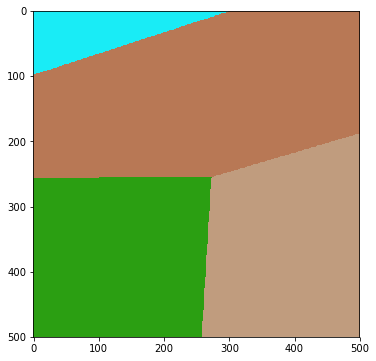

In [19]:
generate_voronoi_diagram(500, 500, 4)

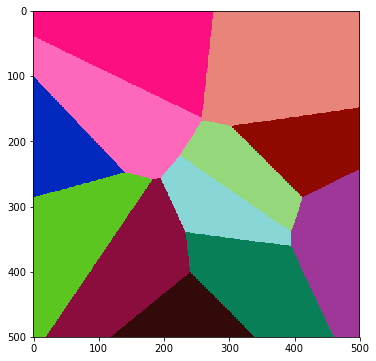

In [20]:
generate_voronoi_diagram(500, 500, 12)

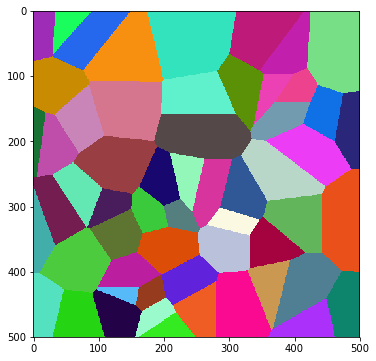

In [21]:
generate_voronoi_diagram(500, 500, 57)

## Bulding Voronoi from clustering

In [7]:
import matplotlib.pyplot as plt
import numpy as np

from sklearn.cluster import KMeans

In [8]:
%matplotlib inline

In [15]:
def get_clusters_cell(n_clusters):
    x = np.arange(100,200,1)
    y = np.arange(100,200,1)
    value = np.random.random(100*100)

    xx,yy = np.meshgrid(x,y)
    xx = xx.reshape(100*100)
    yy = yy.reshape(100*100)
    j = np.dstack((xx,yy,value))[0,:,:]

    fig = plt.figure(figsize =(16,6))
    ax1 = plt.subplot(121)
    xi,yi = np.meshgrid(x,y)
    va = value.reshape(100,100)
    pc = plt.pcolormesh(xi,yi,va,cmap = plt.cm.Spectral)
    plt.colorbar(pc)

    ax2 = plt.subplot(122)
    y_pred = KMeans(n_clusters=n_clusters, random_state=42).fit_predict(j)
    vb = y_pred.reshape(100,100)
    plt.pcolormesh(xi,yi,vb,cmap = plt.cm.Accent)

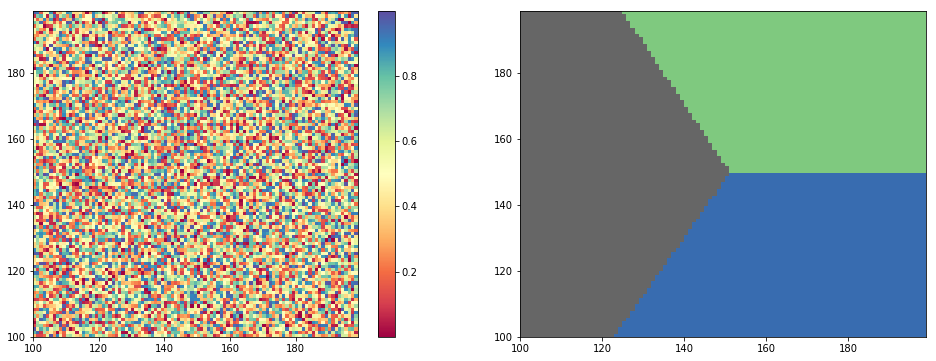

In [22]:
get_clusters_cell(3)

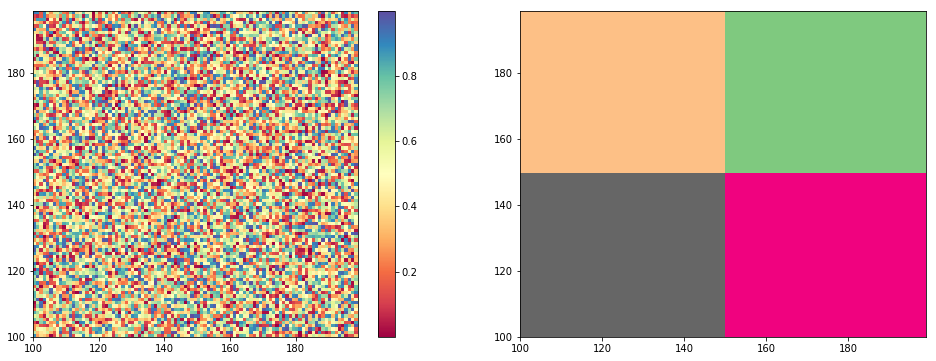

In [27]:
get_clusters_cell(4)

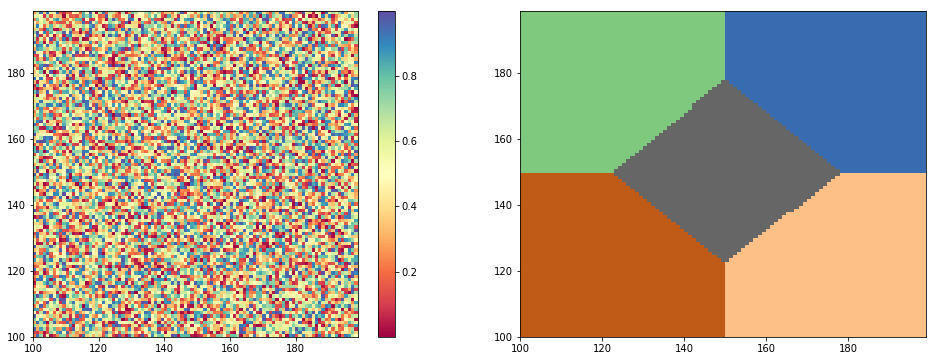

In [24]:
get_clusters_cell(5)

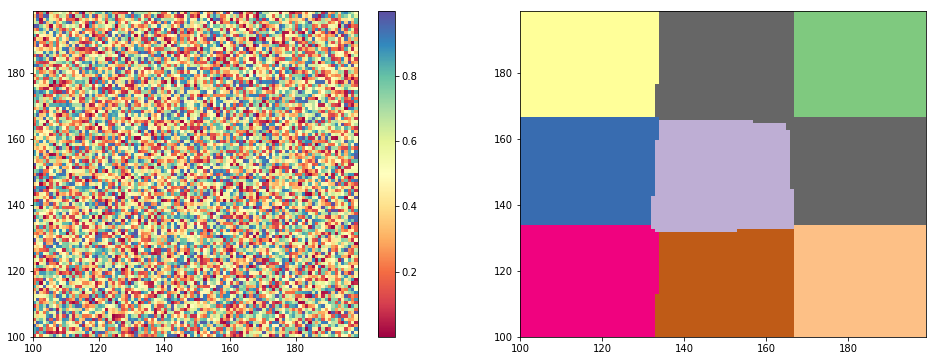

In [25]:
get_clusters_cell(9)

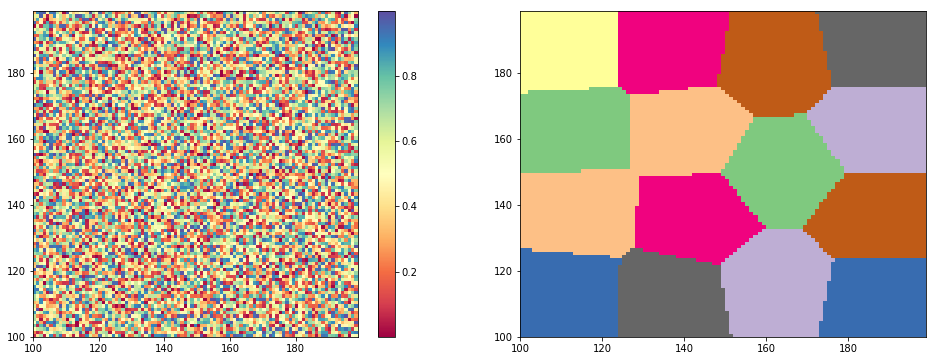

In [26]:
get_clusters_cell(15)